# LAB 8

    host='localhost',
    database='timeseriesanalysisdb',
    user='postgres',
    password='Duke#7539',
    port=5432

In [20]:
import requests
from datetime import datetime

# Your Alpha Vantage API key
api_key = 'SJERGL47QPEJ09N3'

def get_stock_data(symbol):
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': api_key
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    stock_data = []
    if 'Time Series (Daily)' in data:
        time_series = data['Time Series (Daily)']
        for date, values in time_series.items():
            date_obj = datetime.strptime(date, '%Y-%m-%d')
            stock_info = {
                'symbol': symbol,
                'date': date_obj.date(),  # Extracting only the date part
                'open': float(values['1. open']),
                'close': float(values['4. close']),
                'high': float(values['2. high']),
                'low': float(values['3. low']),
                'volume': int(values['5. volume'])
            }
            stock_data.append(stock_info)

    return stock_data

# List of stock symbols: Apple, Microsoft, Tesla
stock_symbols = ['AAPL', 'MSFT', 'TSLA']
all_stock_data = []

for symbol in stock_symbols:
    stock_data = get_stock_data(symbol)
    all_stock_data.extend(stock_data)

# Displaying retrieved stock information
for stock_info in all_stock_data:
    print(f"Symbol: {stock_info['symbol']}, "
          f"Date: {stock_info['date']}, "
          f"Open: {stock_info['open']}, "
          f"Close: {stock_info['close']}, "
          f"High: {stock_info['high']}, "
          f"Low: {stock_info['low']}, "
          f"Volume: {stock_info['volume']}")


Symbol: AAPL, Date: 2023-11-17, Open: 190.25, Close: 189.69, High: 190.38, Low: 188.57, Volume: 50941404
Symbol: AAPL, Date: 2023-11-16, Open: 189.57, Close: 189.71, High: 190.96, Low: 188.65, Volume: 54412915
Symbol: AAPL, Date: 2023-11-15, Open: 187.845, Close: 188.01, High: 189.5, Low: 187.78, Volume: 53790499
Symbol: AAPL, Date: 2023-11-14, Open: 187.7, Close: 187.44, High: 188.11, Low: 186.3, Volume: 60108378
Symbol: AAPL, Date: 2023-11-13, Open: 185.82, Close: 184.8, High: 186.03, Low: 184.21, Volume: 43627519
Symbol: AAPL, Date: 2023-11-10, Open: 183.97, Close: 186.4, High: 186.565, Low: 183.53, Volume: 66177922
Symbol: AAPL, Date: 2023-11-09, Open: 182.96, Close: 182.41, High: 184.12, Low: 181.81, Volume: 53763540
Symbol: AAPL, Date: 2023-11-08, Open: 182.35, Close: 182.89, High: 183.45, Low: 181.59, Volume: 49340282
Symbol: AAPL, Date: 2023-11-07, Open: 179.18, Close: 181.82, High: 182.44, Low: 178.97, Volume: 70529966
Symbol: AAPL, Date: 2023-11-06, Open: 176.38, Close: 179.2

In [21]:
import requests
import psycopg2
from datetime import datetime

# Your Alpha Vantage API key
api_key = 'SJERGL47QPEJ09N3'

# Function to retrieve stock data from Alpha Vantage
def get_stock_data(symbol):
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': api_key
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    stock_data = []
    if 'Time Series (Daily)' in data:
        time_series = data['Time Series (Daily)']
        for date, values in time_series.items():
            date_obj = datetime.strptime(date, '%Y-%m-%d')
            stock_info = {
                'symbol': symbol,
                'date': date_obj.date(),
                'open': float(values['1. open']),
                'close': float(values['4. close']),
                'high': float(values['2. high']),
                'low': float(values['3. low']),
                'volume': int(values['5. volume'])
            }
            stock_data.append(stock_info)

    return stock_data

# Database connection details
db_params = {
    'host': 'localhost',
    'database': 'timeseriesanalysisdb',
    'user': 'postgres',
    'password': 'Duke#7539',
    'port': 5432
}

try:
    # Establish a connection to the PostgreSQL database
    conn = psycopg2.connect(**db_params)

    # Create a cursor object using the connection
    cursor = conn.cursor()

    # List of stock symbols: Apple, Microsoft, Tesla
    stock_symbols = ['AAPL', 'MSFT', 'TSLA']
    all_stock_data = []

    # Retrieve stock data for each symbol from Alpha Vantage
    for symbol in stock_symbols:
        stock_data = get_stock_data(symbol)
        all_stock_data.extend(stock_data)

    # Insert retrieved stock data into the 'stocks' table
    for stock_info in all_stock_data:
        cursor.execute("""
            INSERT INTO stocks (symbol, date, open, close, high, low, volume)
            VALUES (%s, %s, %s, %s, %s, %s, %s)
            """, (stock_info['symbol'], stock_info['date'], stock_info['open'], stock_info['close'],
                  stock_info['high'], stock_info['low'], stock_info['volume']))

    # Commit the changes and close cursor and connection
    conn.commit()
    cursor.close()
    conn.close()
    print("Data successfully inserted into the 'stocks' table.")

except psycopg2.Error as e:
    print("Error connecting to the PostgreSQL database:", e)


Data successfully inserted into the 'stocks' table.


### Technical indicators

In [64]:
import requests
import pandas as pd

# Your Alpha Vantage API key
api_key = 'A7XLMMXWDS57GYAH '

# Function to retrieve stock data from Alpha Vantage
def get_stock_data(symbol):
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': api_key
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    stock_data = []
    if 'Time Series (Daily)' in data:
        time_series = data['Time Series (Daily)']
        for date, values in time_series.items():
            stock_info = {
                'symbol': symbol,
                'date': date,
                'open': float(values['1. open']),
                'close': float(values['4. close']),
                'high': float(values['2. high']),
                'low': float(values['3. low']),
                'volume': int(values['5. volume'])
            }
            stock_data.append(stock_info)

    return stock_data

# Function to retrieve SMA and RSI from Alpha Vantage
def get_technical_indicators(symbol):
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'SMA',
        'symbol': symbol,
        'interval': 'daily',
        'time_period': '20',  # 20-day SMA
        'series_type': 'close',
        'apikey': api_key
    }

    response = requests.get(base_url, params=params)
    sma_data = response.json()
    latest_sma = next(iter(sma_data['Technical Analysis: SMA'].values()))['SMA']

    params['function'] = 'RSI'
    response = requests.get(base_url, params=params)
    rsi_data = response.json()
    latest_rsi = next(iter(rsi_data['Technical Analysis: RSI'].values()))['RSI']

    return {'symbol': symbol, 'sma_20': latest_sma, 'rsi': latest_rsi}

# List of stock symbols: Apple, Microsoft, Tesla
stock_symbols = ['AAPL', 'MSFT', 'TSLA']

# Retrieve stock data for each symbol from Alpha Vantage
all_stock_data = []
for symbol in stock_symbols:
    stock_data = get_stock_data(symbol)
    all_stock_data.extend(stock_data)

# Retrieve SMA and RSI for each symbol
technical_indicators = []
for symbol in stock_symbols:
    tech_indicators = get_technical_indicators(symbol)
    technical_indicators.append(tech_indicators)

# Displaying retrieved stock information
df_stocks = pd.DataFrame(all_stock_data)
df_technical_indicators = pd.DataFrame(technical_indicators)

print("Stocks Data:")
display(df_stocks)

print("\nTechnical Indicators (SMA and RSI):")
display(df_technical_indicators)


Stocks Data:


,symbol,date,open,close,high,low,volume
0,AAPL,2023-11-17,190.250,189.69,190.38,188.57,50941404
1,AAPL,2023-11-16,189.570,189.71,190.96,188.65,54412915
2,AAPL,2023-11-15,187.845,188.01,189.50,187.78,53790499
3,AAPL,2023-11-14,187.700,187.44,188.11,186.30,60108378
4,AAPL,2023-11-13,185.820,184.80,186.03,184.21,43627519
...,...,...,...,...,...,...,...
295,TSLA,2023-07-06,278.090,276.54,279.97,272.88,120707419
296,TSLA,2023-07-05,278.820,282.48,283.85,277.60,131530862
297,TSLA,2023-07-03,276.490,279.82,284.25,275.11,119685891
298,TSLA,2023-06-30,260.600,261.77,264.45,259.89,112620784



Technical Indicators (SMA and RSI):


,symbol,sma_20,rsi
0,AAPL,178.5576,65.7620
1,MSFT,351.6043,65.9264
2,TSLA,217.8225,51.4024


In [52]:
import requests

# Replace 'SJERGL47QPEJ09N3' with your actual Alpha Vantage API key
api_key = 'SJERGL47QPEJ09N3'

# Stock symbols: Microsoft, Apple, Tesla
stocks = ['MSFT', 'AAPL', 'TSLA']

# Dictionary to store SMA and RSI data for each stock
stock_data = {}

# Function to get SMA and RSI data for a stock
def get_stock_data(symbol):
    # Endpoint URL for getting SMA and RSI data from Alpha Vantage
    base_url = f'https://www.alphavantage.co/query?function=SMA&symbol={symbol}&interval=daily&time_period=20&series_type=close&apikey={api_key}'
    rsi_url = f'https://www.alphavantage.co/query?function=RSI&symbol={symbol}&interval=daily&time_period=14&series_type=close&apikey={api_key}'

    # Sending GET requests to the API for SMA and RSI
    response_sma = requests.get(base_url)
    response_rsi = requests.get(rsi_url)

    if response_sma.status_code == 200 and response_rsi.status_code == 200:
        sma_data = response_sma.json()
        rsi_data = response_rsi.json()

        # Display the structure of SMA and RSI data
        print(f"SMA data for {symbol}:")
        print(sma_data)
        print(f"RSI data for {symbol}:")
        print(rsi_data)
    else:
        print(f"Failed to fetch data for {symbol}.")

# Loop through the stocks list and fetch data for each stock
for stock in stocks:
    get_stock_data(stock)


SMA data for MSFT:
{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
RSI data for MSFT:
{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
SMA data for AAPL:
{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
RSI data for AAPL:
{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rat

In [58]:
import requests

# Replace 'demo' with your actual Alpha Vantage API key if available
api_key = 'demo'
stocks = ['MSFT', 'IBM']

for stock in stocks:
    base_url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={stock}&interval=5min&apikey={api_key}'
    response = requests.get(base_url)

    if response.status_code == 200:
        stock_data = response.json()

        # Extracting stock prices (opening, closing, high, low, volume)
        try:
            time_series = stock_data['Time Series (5min)']

            latest_date = list(time_series.keys())[0]
            latest_data = time_series[latest_date]

            open_price = latest_data['1. open']
            close_price = latest_data['4. close']
            high_price = latest_data['2. high']
            low_price = latest_data['3. low']
            volume = latest_data['5. volume']

            print(f"Stock: {stock}")
            print(f"Latest Date: {latest_date}")
            print(f"Opening Price: {open_price}")
            print(f"Closing Price: {close_price}")
            print(f"High Price: {high_price}")
            print(f"Low Price: {low_price}")
            print(f"Volume: {volume}\n")

        except KeyError:
            print(f"No data found for {stock}")

    else:
        print(f"Failed to fetch data for {stock}. Status code:", response.status_code)


Stock: MSFT
Latest Date: 2023-11-17 19:55:00
Opening Price: 365.8700
Closing Price: 366.2700
High Price: 366.4600
Low Price: 365.7100
Volume: 18316

Stock: IBM
Latest Date: 2023-11-17 19:55:00
Opening Price: 152.9800
Closing Price: 153.0800
High Price: 153.0800
Low Price: 152.9800
Volume: 63



In [35]:
import requests

# Your Alpha Vantage API key
api_key = 'SJERGL47QPEJ09N3'

# Function to retrieve SMA and RSI from Alpha Vantage for a given symbol
def get_technical_indicators(symbol):
    base_url = 'https://www.alphavantage.co/query'
    params_sma = {
        'function': 'SMA',
        'symbol': symbol,
        'interval': 'daily',
        'time_period': '20',  # 20-day SMA
        'series_type': 'close',
        'apikey': api_key
    }

    response_sma = requests.get(base_url, params=params_sma)
    sma_data = response_sma.json()
    latest_sma_date = next(iter(sma_data.get('Technical Analysis: SMA', {}).keys()), None)
    latest_sma = next(iter(sma_data.get('Technical Analysis: SMA', {}).values()), {'SMA': None})['SMA']

    params_rsi = {
        'function': 'RSI',
        'symbol': symbol,
        'interval': 'daily',
        'time_period': '14',  # 14-day RSI
        'series_type': 'close',
        'apikey': api_key
    }

    response_rsi = requests.get(base_url, params=params_rsi)
    rsi_data = response_rsi.json()
    latest_rsi_date = next(iter(rsi_data.get('Technical Analysis: RSI', {}).keys()), None)
    latest_rsi = next(iter(rsi_data.get('Technical Analysis: RSI', {}).values()), {'RSI': None})['RSI']

    return {'symbol': symbol, 'date_sma': latest_sma_date, 'sma_20': latest_sma, 'date_rsi': latest_rsi_date, 'rsi': latest_rsi}

# List of stock symbols: Apple, Microsoft, Tesla
stock_symbols = ['AAPL', 'MSFT', 'TSLA']

# List to store technical indicators data
technical_indicators = []

# Retrieve SMA and RSI for each symbol
for symbol in stock_symbols:
    tech_indicators = get_technical_indicators(symbol)
    technical_indicators.append(tech_indicators)

# Displaying retrieved SMA and RSI for each stock
for tech_info in technical_indicators:
    print(f"Symbol: {tech_info['symbol']}, "
          f"SMA Date: {tech_info['date_sma']}, SMA: {tech_info['sma_20']}, "
          f"RSI Date: {tech_info['date_rsi']}, RSI: {tech_info['rsi']}")


Symbol: AAPL, SMA Date: None, SMA: None, RSI Date: None, RSI: None
Symbol: MSFT, SMA Date: None, SMA: None, RSI Date: None, RSI: None
Symbol: TSLA, SMA Date: None, SMA: None, RSI Date: None, RSI: None


In [38]:
import requests
import psycopg2
from datetime import datetime

# Your Alpha Vantage API key
api_key = 'SJERGL47QPEJ09N3'

# Function to retrieve SMA and RSI from Alpha Vantage for a given symbol
def get_technical_indicators(symbol):
    base_url = 'https://www.alphavantage.co/query'
    params_sma = {
        'function': 'SMA',
        'symbol': symbol,
        'interval': 'daily',
        'time_period': '20',  # 20-day SMA
        'series_type': 'close',
        'apikey': api_key
    }

    response_sma = requests.get(base_url, params=params_sma)
    sma_data = response_sma.json()
    latest_sma_date = next(iter(sma_data.get('Technical Analysis: SMA', {}).keys()), None)
    latest_sma = next(iter(sma_data.get('Technical Analysis: SMA', {}).values()), {'SMA': None})['SMA']

    params_rsi = {
        'function': 'RSI',
        'symbol': symbol,
        'interval': 'daily',
        'time_period': '14',  # 14-day RSI
        'series_type': 'close',
        'apikey': api_key
    }

    response_rsi = requests.get(base_url, params=params_rsi)
    rsi_data = response_rsi.json()
    latest_rsi_date = next(iter(rsi_data.get('Technical Analysis: RSI', {}).keys()), None)
    latest_rsi = next(iter(rsi_data.get('Technical Analysis: RSI', {}).values()), {'RSI': None})['RSI']

    return {'symbol': symbol, 'date_sma': latest_sma_date, 'sma_20': latest_sma, 'date_rsi': latest_rsi_date, 'rsi': latest_rsi}

# List of stock symbols: Apple, Microsoft, Tesla
stock_symbols = ['AAPL', 'MSFT', 'TSLA']

# List to store technical indicators data
technical_indicators = []

# Retrieve SMA and RSI for each symbol
for symbol in stock_symbols:
    tech_indicators = get_technical_indicators(symbol)
    technical_indicators.append(tech_indicators)

# Database connection details
db_params = {
    'host': 'localhost',
    'database': 'timeseriesanalysisdb',
    'user': 'postgres',
    'password': 'Duke#7539',
    'port': 5432
}

try:
    # Establish a connection to the PostgreSQL database
    conn = psycopg2.connect(**db_params)

    # Create a cursor object using the connection
    cursor = conn.cursor()

    # Insert fetched data into the 'technical_indicators' table
    for tech_info in technical_indicators:
        cursor.execute("""
            INSERT INTO technical_indicators (symbol, date, sma_20, rsi, macd)
            VALUES (%s, COALESCE(%s, CURRENT_DATE), %s, %s, %s)
            """, (tech_info['symbol'], tech_info['date_sma'], tech_info['sma_20'], tech_info['rsi'], None))

    # Commit the changes and close cursor and connection
    conn.commit()
    cursor.close()
    conn.close()
    print("Data successfully inserted into the 'technical_indicators' table.")

except psycopg2.Error as e:
    print("Error connecting to the PostgreSQL database:", e)


Data successfully inserted into the 'technical_indicators' table.


### News_sentiment_analysis

In [39]:
import requests

# Your Alpha Vantage API key
api_key = 'SJERGL47QPEJ09N3'

# Function to get stock prices and dates
def get_stock_data(symbol):
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': api_key
    }

    response = requests.get(base_url, params=params)
    stock_data = response.json()

    if 'Time Series (Daily)' in stock_data:
        time_series = stock_data['Time Series (Daily)']
        prices_and_dates = [{'date': date, 'price': data['4. close']} for date, data in time_series.items()]
        return prices_and_dates

    return None

# List of stock symbols: Apple, Microsoft, Tesla
stock_symbols = ['AAPL', 'MSFT', 'TSLA']

# Dictionary to store stock prices and dates
stock_prices_dates = {}

# Retrieve stock prices and dates for each symbol
for symbol in stock_symbols:
    data = get_stock_data(symbol)
    stock_prices_dates[symbol] = data

# Displaying stock prices and dates
for symbol, data in stock_prices_dates.items():
    print(f"Stock Symbol: {symbol}")
    if data:
        for entry in data:
            print(f"Date: {entry['date']}, Price: {entry['price']}")
    else:
        print("No data available")


Stock Symbol: AAPL
No data available
Stock Symbol: MSFT
No data available
Stock Symbol: TSLA
No data available


In [45]:
import requests
import psycopg2
from datetime import datetime

# Your Alpha Vantage API key
api_key = 'SJERGL47QPEJ09N3'

# Function to get stock prices and dates

# Function to insert sentiment analysis data into the database
def insert_sentiment_analysis(conn, symbol, sentiment_data):
    try:
        cursor = conn.cursor()

        if sentiment_data:
            # If sentiment data is available, insert it into the table
            cursor.execute("""
                INSERT INTO news_sentiment_analysis (date, positive_articles, negative_articles, neutral_articles)
                VALUES (%s, %s, %s, %s)
                """, (datetime.now().date(), sentiment_data.get('positive'), sentiment_data.get('negative'), sentiment_data.get('neutral')))
        else:
            # If sentiment data is not available, insert NULL values into the table
            cursor.execute("""
                INSERT INTO news_sentiment_analysis (date, positive_articles, negative_articles, neutral_articles)
                VALUES (%s, NULL, NULL, NULL)
                """, (datetime.now().date(),))

        conn.commit()
        cursor.close()
        print(f"Data successfully inserted for symbol {symbol} into the 'news_sentiment_analysis' table.")

    except psycopg2.Error as e:
        print("Error inserting data into the 'news_sentiment_analysis' table:", e)

# List of stock symbols: Apple, Microsoft, Tesla
stock_symbols = ['AAPL', 'MSFT', 'TSLA']

# Dictionary to store sentiment analysis data
sentiment_analysis_data = {
    'AAPL': None,  # Replace with actual sentiment analysis data
    'MSFT': None,  # Replace with actual sentiment analysis data
    'TSLA': None   # Replace with actual sentiment analysis data
}

# Database connection details
db_params = {
    'host': 'localhost',
    'database': 'timeseriesanalysisdb',
    'user': 'postgres',
    'password': 'Duke#7539',
    'port': 5432
}

try:
    # Establish a connection to the PostgreSQL database
    conn = psycopg2.connect(**db_params)

    # Retrieve stock prices and dates for each symbol
    stock_prices_dates = {}
    for symbol in stock_symbols:
        data = get_stock_data(symbol)
        stock_prices_dates[symbol] = data

    # Insert sentiment analysis data into the 'news_sentiment_analysis' table
    for symbol, sentiment_data in sentiment_analysis_data.items():
        insert_sentiment_analysis(conn, symbol, sentiment_data)

    # Close the database connection
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to the PostgreSQL database:", e)


Data successfully inserted for symbol AAPL into the 'news_sentiment_analysis' table.
Data successfully inserted for symbol MSFT into the 'news_sentiment_analysis' table.
Data successfully inserted for symbol TSLA into the 'news_sentiment_analysis' table.


External_events

In [46]:
import requests

# Your Alpha Vantage API key
api_key = 'SJERGL47QPEJ09N3'

# Function to get stock prices and dates
def get_stock_data(symbol):
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': api_key
    }

    response = requests.get(base_url, params=params)
    stock_data = response.json()

    if 'Time Series (Daily)' in stock_data:
        time_series = stock_data['Time Series (Daily)']
        prices_and_dates = [{'date': date, 'price': data['4. close']} for date, data in time_series.items()]
        return prices_and_dates

    return None

# List of stock symbols: Apple, Microsoft, Tesla
stock_symbols = ['AAPL', 'MSFT', 'TSLA']

# Dictionary to store stock prices and dates
stock_prices_dates = {}

# Retrieve stock prices and dates for each symbol
for symbol in stock_symbols:
    data = get_stock_data(symbol)
    stock_prices_dates[symbol] = data

# Displaying stock prices and dates
for symbol, data in stock_prices_dates.items():
    print(f"Stock Symbol: {symbol}")
    if data:
        for entry in data:
            print(f"Date: {entry['date']}, Price: {entry['price']}")
    else:
        print("No data available")


Stock Symbol: AAPL
No data available
Stock Symbol: MSFT
No data available
Stock Symbol: TSLA
No data available


### Visualization

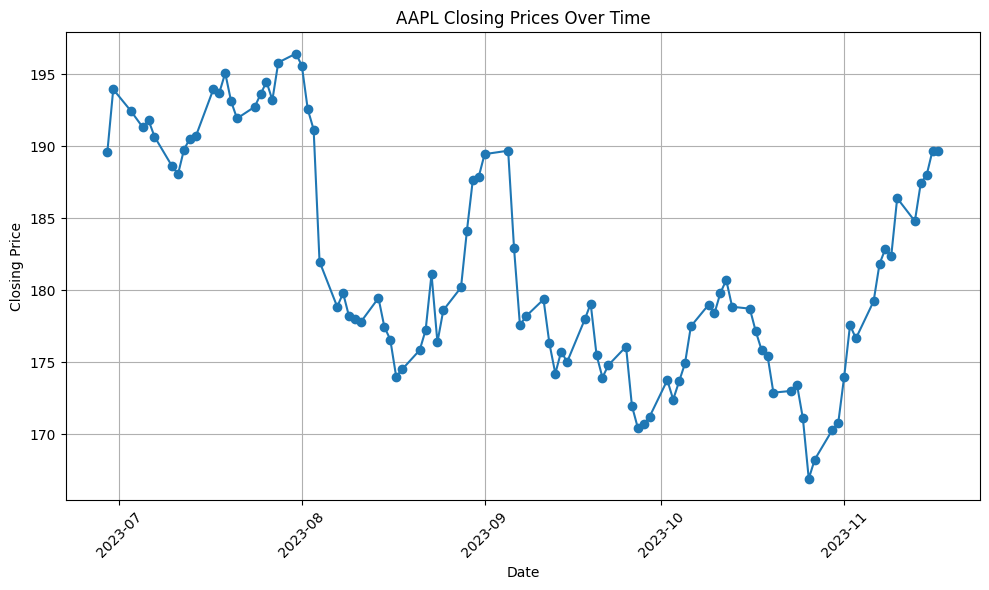

In [49]:
import psycopg2
import matplotlib.pyplot as plt

# Database connection details
db_params = {
    'host': 'localhost',
    'database': 'timeseriesanalysisdb',
    'user': 'postgres',
    'password': 'Duke#7539',
    'port': 5432
}

try:
    # Establish a connection to the PostgreSQL database
    conn = psycopg2.connect(**db_params)

    # Create a cursor object using the connection
    cursor = conn.cursor()

    # Fetch data from the 'stocks' table
    cursor.execute("SELECT date, close FROM stocks WHERE symbol = 'AAPL' ORDER BY date")
    data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    if data:
        # Separate the date and closing prices for plotting
        dates = [row[0] for row in data]
        closing_prices = [row[1] for row in data]

        # Create a simple line plot using Matplotlib
        plt.figure(figsize=(10, 6))
        plt.plot(dates, closing_prices, marker='o', linestyle='-')
        plt.title('AAPL Closing Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    else:
        print("No data available")

except psycopg2.Error as e:
    print("Error connecting to the PostgreSQL database:", e)


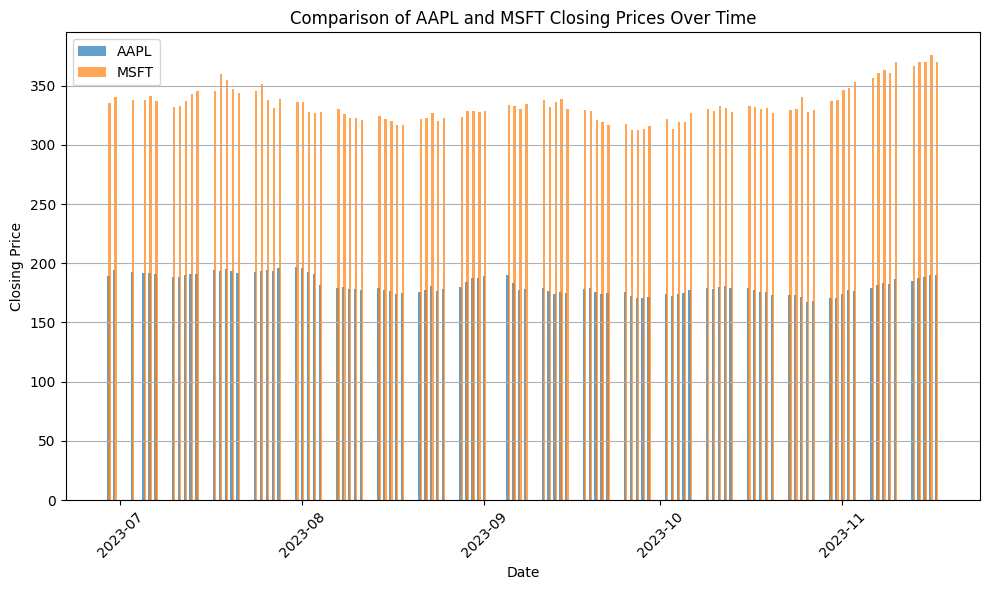

In [50]:
import psycopg2
import matplotlib.pyplot as plt

# Database connection details
db_params = {
    'host': 'localhost',
    'database': 'timeseriesanalysisdb',
    'user': 'postgres',
    'password': 'Duke#7539',
    'port': 5432
}

try:
    # Establish a connection to the PostgreSQL database
    conn = psycopg2.connect(**db_params)

    # Create a cursor object using the connection
    cursor = conn.cursor()

    # Fetch data for Apple (AAPL)
    cursor.execute("SELECT date, close FROM stocks WHERE symbol = 'AAPL' ORDER BY date")
    apple_data = cursor.fetchall()

    # Fetch data for Microsoft (MSFT)
    cursor.execute("SELECT date, close FROM stocks WHERE symbol = 'MSFT' ORDER BY date")
    microsoft_data = cursor.fetchall()

    # Close cursor and connection
    cursor.close()
    conn.close()

    if apple_data and microsoft_data:
        # Separate the date and closing prices for Apple
        apple_dates = [row[0] for row in apple_data]
        apple_closing_prices = [row[1] for row in apple_data]

        # Separate the date and closing prices for Microsoft
        microsoft_dates = [row[0] for row in microsoft_data]
        microsoft_closing_prices = [row[1] for row in microsoft_data]

        # Create a bar plot comparing Apple and Microsoft closing prices
        plt.figure(figsize=(10, 6))
        plt.bar(apple_dates, apple_closing_prices, width=0.4, align='center', label='AAPL', alpha=0.7)
        plt.bar(microsoft_dates, microsoft_closing_prices, width=0.4, align='edge', label='MSFT', alpha=0.7)
        plt.title('Comparison of AAPL and MSFT Closing Prices Over Time')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    else:
        print("No data available for either AAPL or MSFT")

except psycopg2.Error as e:
    print("Error connecting to the PostgreSQL database:", e)


### TEST

In [62]:
import requests
import pandas as pd

# Your Alpha Vantage API key
api_key = 'demo'  # Replace 'demo' with your actual API key

# API endpoint URL
url = 'https://www.alphavantage.co/query'

# Parameters for the API call
params = {
    'function': 'TIME_SERIES_INTRADAY',
    'symbol': 'IBM',
    'interval': '5min',
    'apikey': api_key
}

# Making the API request
response = requests.get(url, params=params)

# Parsing JSON data into a DataFrame
if response.status_code == 200:
    data = response.json()
    if 'Meta Data' in data:
        symbol = data['Meta Data']['2. Symbol']
        df = pd.DataFrame(data['Time Series (5min)']).T
        df.index.name = 'Timestamp'
        df['Symbol'] = symbol  # Adding a 'Symbol' column
        print(df.head())  # Displaying the first few rows of the DataFrame
    else:
        print("No 'Meta Data' available in the response.")
else:
    print("Failed to retrieve data. Response status code:", response.status_code)


                      1. open   2. high    3. low  4. close 5. volume Symbol
Timestamp                                                                   
2023-11-17 19:55:00  152.9800  153.0800  152.9800  153.0800        63    IBM
2023-11-17 19:40:00  152.9800  152.9800  152.9800  152.9800         3    IBM
2023-11-17 19:25:00  153.0000  153.0300  152.7500  152.8800        20    IBM
2023-11-17 19:20:00  152.9700  152.9700  152.9700  152.9700         2    IBM
2023-11-17 19:15:00  153.0900  153.0900  153.0900  153.0900         5    IBM
